# Project 2 Solution
![LeNet Architecture](MNIST_data/traffic_sign.jpg)


## Step 0: Load Traffic Sign Data

Load the German Traffic Sign benchmark data

In [73]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'train.p'
testing_file = 'test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_test, y_test = test['features'], test['labels']

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.2, random_state=42)
print("Updated Image Shape: {}".format(X_train[0].shape))

Updated Image Shape: (32, 32, 3)


## Visualize Data

View a sample from the dataset.

You do not need to modify this section.

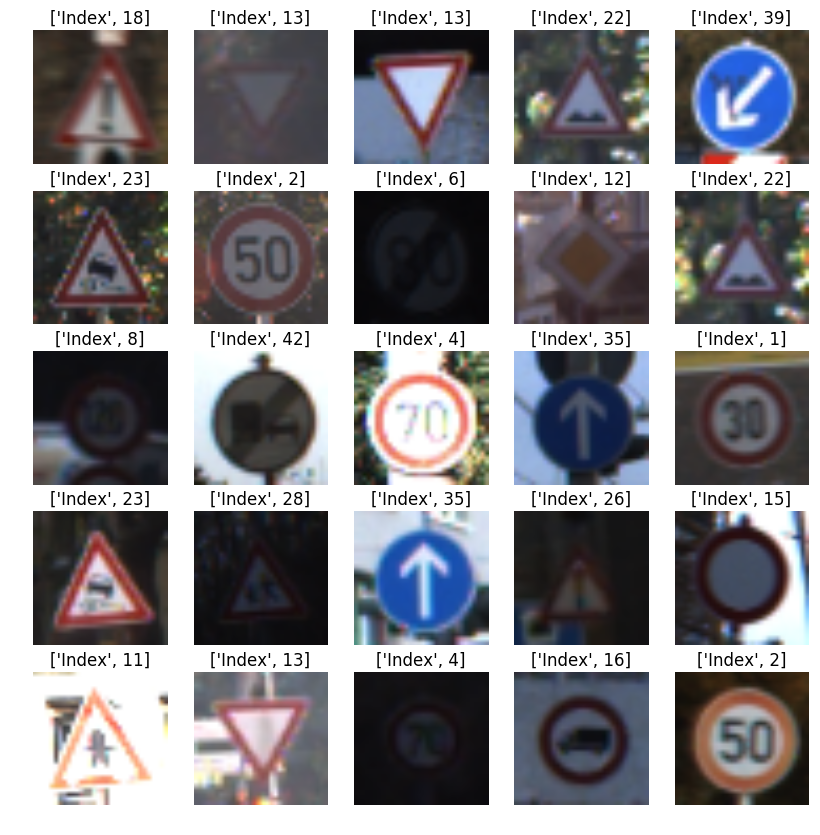

In [69]:
import random
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

index = random.randint(0, len(X_train))
image = X_train[index].squeeze()

#plt.figure(figsize=(1,1))
#plt.imshow(image)
fig, axes = plt.subplots(5,5, figsize=(10, 10))

for i in range(5):
    for j in range(5):
        index = random.randint(0, len(X_train))
        image = X_train[index]
        axes[i,j].axis('off')
        axes[i,j].imshow(image)
        axes[i,j].set_title(["Index", y_train[index]])

### Data Summary & Exploration

In [50]:
### Replace each question mark with the appropriate value.

# TODO: Number of training examples
n_train = len(X_train)

# TODO: Number of testing examples.
n_test = len(X_test)

# TODO: What's the shape of an traffic sign image?
image_shape =len(image)

# TODO: How many unique classes/labels there are in the dataset.
file = open("signnames.csv")
n_classes = len(file.readlines())

print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", X_train[0].shape)
print("Number of classes =", n_classes)

Number of training examples = 31367
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 44


## Preprocess Data

Shuffle the training data.

You do not need to modify this section.

In [51]:
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)

## Setup TensorFlow
The `EPOCH` and `BATCH_SIZE` values affect the training speed and model accuracy.

You do not need to modify this section.

In [52]:
import tensorflow as tf

EPOCHS = 20
BATCH_SIZE = 128

## SOLUTION: Implement LeNet-5
Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.

This is the only cell you need to edit.
### Input
The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case.

### Architecture
**Layer 1: Convolutional.** The output shape should be 28x28x6.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 14x14x6.

**Layer 2: Convolutional.** The output shape should be 10x10x16.

**Activation.** Your choice of activation function.

**Pooling.** The output shape should be 5x5x16.

**Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.

**Layer 3: Fully Connected.** This should have 120 outputs.

**Activation.** Your choice of activation function.

**Layer 4: Fully Connected.** This should have 84 outputs.

**Activation.** Your choice of activation function.

**Layer 5: Fully Connected (Logits).** This should have 10 outputs.

### Output
Return the result of the 2nd fully connected layer.

In [53]:
from tensorflow.contrib.layers import flatten

def LeNet(x):    
    # Hyperparameters
    mu = 0
    sigma = 0.1
    
    # SOLUTION: Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # SOLUTION: Activation.
    conv1 = tf.nn.relu(conv1)

    # SOLUTION: Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # SOLUTION: Activation.
    conv2 = tf.nn.relu(conv2)

    # SOLUTION: Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # SOLUTION: Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # SOLUTION: Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # SOLUTION: Activation.
    fc1    = tf.nn.relu(fc1)
    
    # SOLUTION: Dropout(Modified)
    #fc1 = tf.nn.dropout(fc1, 0.02)

    # SOLUTION: Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # SOLUTION: Activation.
    fc2    = tf.nn.relu(fc2)
    #fc2 = tf.nn.dropout(fc2, 0.01)
    
    # SOLUTION: Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

## Features and Labels
Train LeNet to classify German Traffic Sign dataset.

`x` is a placeholder for a batch of input images.
`y` is a placeholder for a batch of output labels.

You do not need to modify this section.

In [54]:
x = tf.placeholder(tf.float32, (None, 32, 32, 3))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

## Training Pipeline
Create a training pipeline that uses the model to classify  German Traffic Sign dataset.

You do not need to modify this section.

In [55]:
rate = 0.001

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

## Model Evaluation
Evaluate how well the loss and accuracy of the model for a given dataset.

You do not need to modify this section.

In [56]:
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

## Train the Model
Run the training data through the training pipeline to train the model.

Before each epoch, shuffle the training set.

After each epoch, measure the loss and accuracy of the validation set.

Save the model after training.

You do not need to modify this section.

In [57]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print('Number of training samples: {}'.format(num_examples))
    print("Training...")
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_validation, y_validation)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Number of training samples: 31367
Training...

EPOCH 1 ...
Validation Accuracy = 0.660

EPOCH 2 ...
Validation Accuracy = 0.809

EPOCH 3 ...
Validation Accuracy = 0.881

EPOCH 4 ...
Validation Accuracy = 0.893

EPOCH 5 ...
Validation Accuracy = 0.915

EPOCH 6 ...
Validation Accuracy = 0.926

EPOCH 7 ...
Validation Accuracy = 0.929

EPOCH 8 ...
Validation Accuracy = 0.943

EPOCH 9 ...
Validation Accuracy = 0.946

EPOCH 10 ...
Validation Accuracy = 0.951

EPOCH 11 ...
Validation Accuracy = 0.925

EPOCH 12 ...
Validation Accuracy = 0.950

EPOCH 13 ...
Validation Accuracy = 0.952

EPOCH 14 ...
Validation Accuracy = 0.957

EPOCH 15 ...
Validation Accuracy = 0.955

EPOCH 16 ...
Validation Accuracy = 0.959

EPOCH 17 ...
Validation Accuracy = 0.961

EPOCH 18 ...
Validation Accuracy = 0.953

EPOCH 19 ...
Validation Accuracy = 0.958

EPOCH 20 ...
Validation Accuracy = 0.959

Model saved


## Evaluate the Model
Once you are completely satisfied with your model, evaluate the performance of the model on the test set.

Be sure to only do this once!

If you were to measure the performance of your trained model on the test set, then improve your model, and then measure the performance of your model on the test set again, that would invalidate your test results. You wouldn't get a true measure of how well your model would perform against real data.

You do not need to modify this section.

In [82]:
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

Test Accuracy = 0.881


### Question 1

_Describe how you preprocessed the data. Why did you choose that technique?_

**Answer:**

Since the size of traffic sign input image was already 32x32 which matches the required size of input to the LeNet-5, there was no need to resize the data. In the preprocessing phase, the _shuffling_ of data was performed each time using the _shuffle_ function so that our model does not overfit the output. It was chosen because the fairly efficient and yet easy to implement.

### Question 2

_Describe how you set up the training, validation and testing data for your model. Optional: If you generated additional data, how did you generate the data? Why did you generate the data? What are the differences in the new dataset (with generated data) from the original dataset?_

**Answer:**

The training and test datasets were directly obtained from the given **train.p** and **test.p** files respectively. Because the traffic sign data does not come with the validation set, the _train_ _ _set_ _ _split_ function available in the **sk_learn** library was used to slice off a validtion set from the training set. In the current case, _20%_ of training data is allocated as the validation data.

### Question 3
_What does your final architecture look like? (Type of model, layers, sizes, connectivity, etc.)_

**Answer**

Type of model : LeNet-5 Architecture, 
No. of layers : 6 layers (3 convolution layers, 2 pooling layers and 1 fully connected latyer),
sizes,
* Convolution Layer C1 output Size             : 28x28
* Pooling/Subsampling Layer S2 output Size     : 14x14
* Convolution Layer C3 output Size             : 10x10
* Pooling/Subsampling Layer S4 output Size     :  5x5
* Fully connected layer F5 Size                :  120
* Fully connected layer F6 Size                :  84
* output Layer Size                             :  43

### Question 4
_How did you train your model? (Type of optimizer, batch size, epochs, hyperparameters, etc.)_

**Answer**

Type of optimizer :
Batch size : 128
no. of epochs :15
Learning rate : 0.001
Hyperparameters
mu = 0
sigma = 0.1

### Question 5
_What approach did you take in coming up with a solution to this problem? It may have been a process of trial and error, in which case, outline the steps you took to get to the final solution and why you chose those steps. Perhaps your solution involved an already well known implementation or architecture. In this case, discuss why you think this is suitable for the current problem._

**Answer**

As suggested by the instructor in the lecture videos, the LeNet implementation provides a solid foundation to start Traffic Sign Classification project. I resorted to that and it indeed proved to be so. The accuracy of the model increased when the number of epochs and batch size was increased but it came at the expense of the training time and the available resources. So, without overwhelming my computer that thankfully has an NVIDIA GPU, i kept the batch size of 128 with number of epochs to be 15.

## Test a Model on new Images

### Load the images and plot them here.

Feel free to use as many code cells as needed.

(32, 32, 3)
(20, 32, 32, 1)


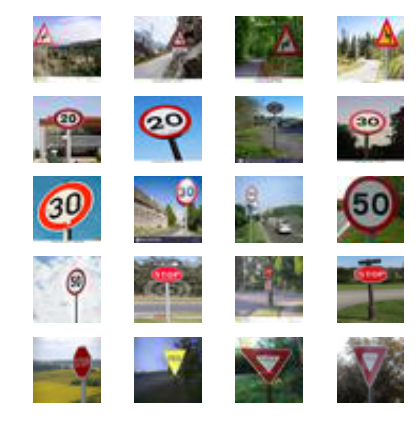

In [86]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

import tensorflow as tf
import numpy as np
import cv2
import glob

#Using the same method as previously used to display German Traffic Sign Images

fig, axes = plt.subplots(5,4, figsize=(5, 5))
axes = axes.ravel()

#images_resized = []
images = []

#enumerate function is used to display the path and tag it with a number,
for i,image_path in enumerate(glob.glob('*.jpg')):
    image = cv2.imread(image_path)
    images.append(image)
    axes[i].axis('off')
    axes[i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

print(image.shape)

my_images = images
my_images = np.asarray(my_images)

my_images_gry = np.sum(my_images/3, axis=3, keepdims=True)

my_images_normalized = (my_images_gry - 128)/128 

print(my_images_normalized.shape)

### Question 6

_Choose five candidate images of traffic signs and provide them in the report. Are there any particular qualities of the image(s) that might make classification difficult? It could be helpful to plot the images in the notebook_.

_**Answer**_

From the previously shown additional images in the last chunk of the code, it is pretty clear that some of images are very obscure and not quite readable and might not be detected well. It could be justified by the fact that the images might have been captured from somewhat inappropriate distance and angle. Further reduction of size to 32x32, to make it suitable for the LeNet, further worsens the case by removing most of the details available that would otherwise be helpful to recognize the image. So, for various randomized labels, the accuracy fluctuates from 0.00 - 0.10, which is not good at all.  

In [112]:
# There are 20 input images with 43 classes defined that are inferred from the German Traffic Sign Dataset
labels =  np.random.randint(43, size=20)
print(labels)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver3 = tf.train.import_meta_graph('./lenet.meta')
    saver3.restore(sess, "./lenet")
    accuracy = evaluate(my_images, labels)
    print("Test Set Accuracy = {:.3f}".format(accuracy))

[24 17 25 42 12 21  0 42 40 21 15  2  1  2 32 37 22 18 34 21]
Test Set Accuracy = 0.000


### Question 7
_Is your model able to perform equally well on captured pictures when compared to testing on the dataset? The simplest way to do this check the accuracy of the predictions. For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate._

_NOTE: You could check the accuracy manually by using signnames.csv (same directory). This file has a mapping from the class id (0-42) to the corresponding sign name. So, you could take the class id the model outputs, lookup the name in signnames.csv and see if it matches the sign from the image._

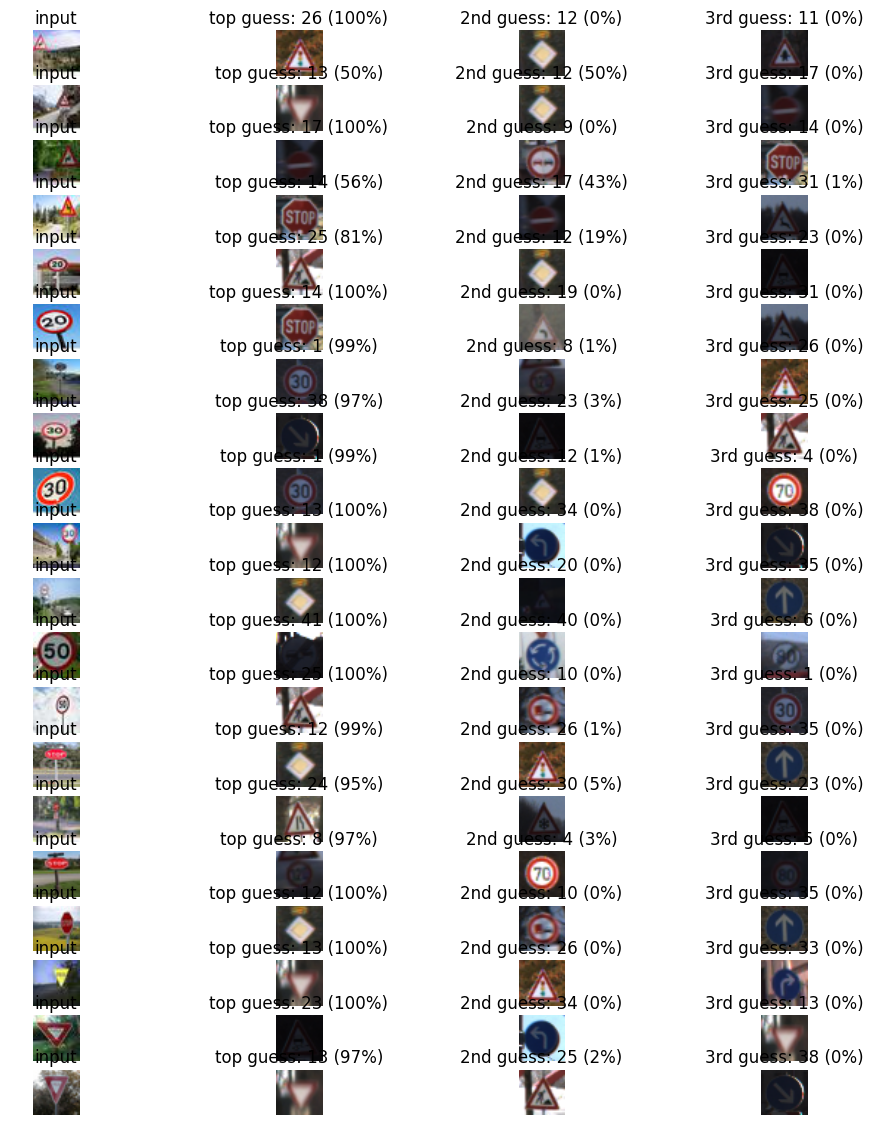

In [114]:
softmax_logits = tf.nn.softmax(logits)
top_k = tf.nn.top_k(softmax_logits, k=3)

#X = tf.placeholder('float')
keep_prob = tf.placeholder('float')

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    saver = tf.train.import_meta_graph('./lenet.meta')
    saver.restore(sess, "./lenet")
    my_softmax_logits = sess.run(softmax_logits, feed_dict={x: my_images, keep_prob: 1.0})
    my_top_k = sess.run(top_k, feed_dict={x: my_images, keep_prob: 1.0})

fig, axs = plt.subplots(len(my_images),4, figsize =(12,14))
axs = axs.ravel()

for i, image in enumerate(my_images):
        axs[4*i].axis('off')
        axs[4*i].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        axs[4*i].set_title('input')
        guess1 = my_top_k[1][i][0]
        index1 = np.argwhere(y_validation == guess1)[0]
        axs[4*i+1].axis('off')
        axs[4*i+1].imshow(X_validation[index1].squeeze(), cmap='gray')
        axs[4*i+1].set_title('top guess: {} ({:.0f}%)'.format(guess1, 100*my_top_k[0][i][0]))
        guess2 = my_top_k[1][i][1]
        index2 = np.argwhere(y_validation == guess2)[0]
        axs[4*i+2].axis('off')
        axs[4*i+2].imshow(X_validation[index2].squeeze(), cmap='gray')
        axs[4*i+2].set_title('2nd guess: {} ({:.0f}%)'.format(guess2, 100*my_top_k[0][i][1]))
        guess3 = my_top_k[1][i][2]
        index3 = np.argwhere(y_validation == guess3)[0]
        axs[4*i+3].axis('off')
        axs[4*i+3].imshow(X_validation[index3].squeeze(), cmap='gray')
        axs[4*i+3].set_title('3rd guess: {} ({:.0f}%)'.format(guess3, 100*my_top_k[0][i][2]))

### Question 8

_Use the model's softmax probabilities to visualize the certainty of its predictions, tf.nn.top k could prove helpful here. Which predictions is the model certain of? Uncertain? If the model was incorrect in its initial prediction, does the correct prediction appear in the top k? (k should be 5 at most)_

tf.nn.top_k will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example:
%% (5, 6) array

a = np.array([

      [ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497, 0.12789202],
      
      [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401, 0.15899337],
      
      [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 , 0.23892179],
      
      [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 , 0.16505091], 
      
      [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137, 0.09155967]])

Running it through sess.run(tf.nn.top_k(tf.constant(a), k=3)) produces:

TopKV2(values=array([
       
       [ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), 
       
       indices=array([
       
       [3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
Looking just at the first row we get [ 0.34763842,  0.24879643,  0.12789202], you can confirm these are the 3 largest probabilities in a. You'll also notice [3, 0, 5] are the corresponding indices.

**Answer:**

The model performs very awful on my images. Due to very blurred images, the details are not quite clear for the LeNet to predict. I think another reason of this could also be of very limited number of input images. 

26 0.999968
13 0.503793
17 1.0
14 0.559184
25 0.806669
14 1.0
1 0.990346
38 0.9744
1 0.990276
13 0.999992
12 0.995426
41 0.997154
25 1.0
12 0.986607
24 0.947938
8 0.965793
12 0.999999
13 0.997311
23 0.99781
13 0.972697


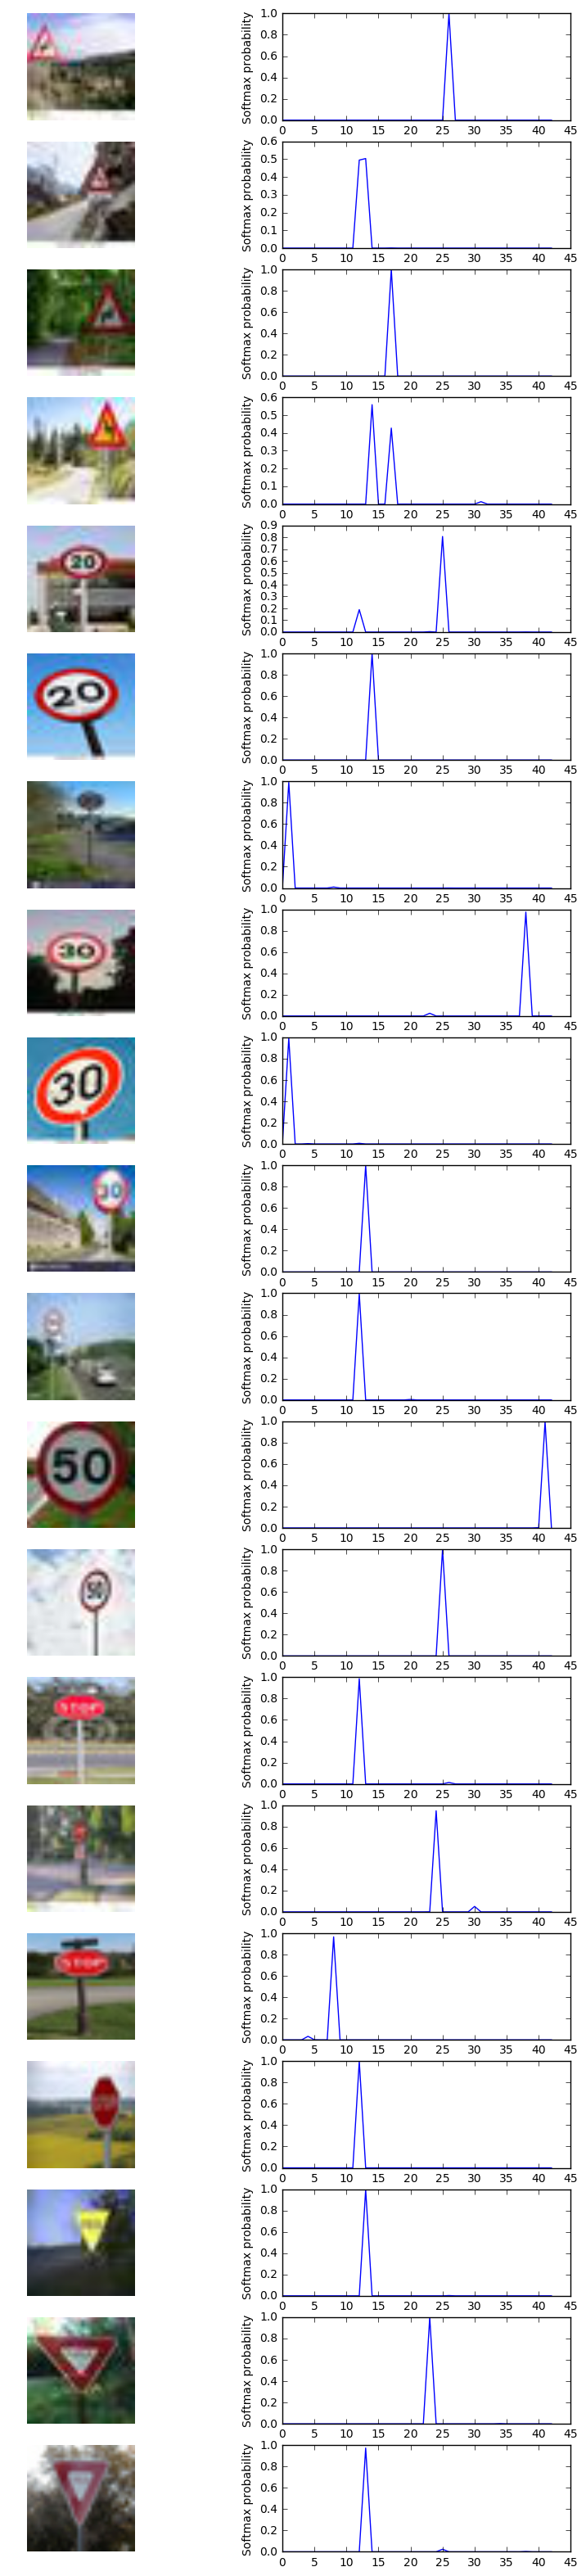

In [187]:
fig, axes = plt.subplots(20,2, figsize=(10, 40))

for i in range(20): 
    print(np.argmax(my_softmax_logits[i]), np.max(my_softmax_logits[i]))
    for j in range(3):
        if j == 0:
            axes[i,j].axis('off')
            axes[i,j].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
        if j == 1:
            #axes[i,j].imshow(cv2.cvtColor(images[i], cv2.COLOR_BGR2RGB))
            axes[i,j].plot(my_softmax_logits[i])
            axes[i,j].set_ylabel('Softmax probability')

From the above displayed plots, we can comment on the performance of LeNet with our own input images. It can be seen from above plots that the network is quite confident about some and not so confident about the others. A brief summary of the predictions based on the above plots is tabulated below: 

\begin{array}{rr} \hline
Input Image No. &Input Image Feature &SoftmaxProbability(max) &MNIST Image Matched\\ \hline
1 &DoubleTurn 1 &0.999968 &TrafficSignal  \\ \hline
2 &DoubleTurn 2 &0.503793 &Yield  \\ \hline
3 &DoubleTurn 3 &1.0 &NoEntry  \\ \hline
4 &DoubleTurn 4 &0.559184 &Stop  \\ \hline
5 &SpeedLimit20[1] &0.806669 &RoadWork  \\ \hline
6 &SpeedLimit20[2] &1.0 &Stop  \\ \hline
7 &SpeedLimit20[3] &0.99035 &SpeedLimit20-MATCHED  \\ \hline
8 &SpeedLimit20[4] &0.9744 &KeepRight  \\ \hline
9 &SpeedLimit50[1] &0.99028 &SpeedLimit20  \\ \hline
10 &SpeedLimit50[2] &0.99999 &Yield  \\ \hline
11 &SpeedLimit50[3] &0.99543 &PriorityRoad  \\ \hline
12 &SpeedLimit50[4] &0.99715 &EndOfNoPassing  \\ \hline
13 &StopSign1 &1.0  &RoadWork\\ \hline
14 &StopSign2 &0.98661 &PriorityRoad  \\ \hline
15 &StopSign3 &0.94794 &RoadNarrowsOnTheRight \\ \hline
16 &StopSign4 &0.96579 &SpeedLimit120 \\ \hline
17 &YieldSign1 &1.0  &PriorityRoad \\ \hline
18 &YieldSign2 &0.99731 &Yield-MATCHED  \\ \hline
19 &YieldSign3 &0.99781 &SlipperyRoad  \\ \hline
20 &YieldSign4 &0.9727 &Yield-MATCHED  \\ \hline
\end{array}